In [1]:
import yfinance as yf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from stock_list import stocklist

In [3]:
stocklist.keys()

dict_keys(['sharpe_stocks', 'drawdown_stocks', 'esg_stocks2', 'esg_stock_ndsv', 'pe_stocks', 'test'])

In [4]:
selected_stocks = stocklist['test']
start_date = '2020-01-01'
end_date = '2021-01-01'

In [5]:
def get_data(stock, start_date, end_date):
    data = yf.download(stock + '.NS', start=start_date, end=end_date)
    return data

In [6]:
df = pd.DataFrame()
for stock in selected_stocks:
    data = get_data(stock, start_date, end_date)
    df[stock] = data['Close']

df.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,EDELWEISS,HIL
Date,,
2020-01-01,59.619141,1264.349976
2020-01-02,64.997292,1381.050049
2020-01-03,64.456779,1353.300049
2020-01-06,60.700176,1289.300049
2020-01-07,62.213627,1301.250000


In [7]:
esg_data = pd.read_json('esg_data.json')

In [8]:
esg_data.head()

,esg,esg_industry,industry,name,ticker
0,[],[],Mining (except Oil & Gas),20-Microns-Ltd,20MICRONS
1,"[[1622505600000, 14.44], [1625097600000, 14.46...","[[1622505600000, 13.83], [1625097600000, 12.9]...",Containers & Packaging Manufacturing,3M-INDIA-LIMITED,3MINDIA
2,"[[1633046400000, 36.21], [1635724800000, 35.68...","[[1633046400000, 19.94], [1635724800000, 20.25...",Brokerage & Capital Markets,5paisa-Capital-Limited,5PAISA
3,[],[],Brokerage & Capital Markets,A-K-CAPITAL-SERVICES-LIMITED,530499
4,[],[],"Architectural, Engineering, & Related Services",A2Z-MAINTENANCE-and-ENGINEERING-SERVICES-LIMITED,A2ZINFRA


In [9]:
esg_data = esg_data[esg_data['ticker'].isin(selected_stocks)]
esg_data = esg_data.set_index('ticker')
esg_data.head()

,esg,esg_industry,industry,name
ticker,,,,
EDELWEISS,"[[1622505600000, 99.61], [1625097600000, 99.56...","[[1622505600000, 99.64], [1625097600000, 99.3]...",Brokerage & Capital Markets,Edelweiss-Financial-Services-Limited
HIL,"[[1672531200000, 89.66], [1675209600000, 90.26...","[[1672531200000, 91.79], [1675209600000, 93.26...",Specialty Retail,HIL-Ltd


In [10]:
ESG_score_df = pd.DataFrame()
for ticker in selected_stocks:
    print(ticker)
    sum = 0
    n = 0
    for el in esg_data.loc[ticker]['esg']:
      n = n + 1
      sum = sum + el[1]

    ESG_score_df[ticker] = [sum/n]

ESG_score_df = ESG_score_df.T
ESG_score_df.columns = ['ESG_score']
ESG_score_df.head()   

EDELWEISS
HIL


,ESG_score
EDELWEISS,88.800417
HIL,89.638000


In [12]:
from plot import generate_plot

In [13]:
Sigma = df.pct_change().apply(lambda x: np.log(1+x)).cov()
Esg_score = ESG_score_df['ESG_score']
mu = df.pct_change().apply(lambda x: np.log(1+x)).mean()
u_values = np.linspace(0, 0.3, 100)
l_values = np.linspace(50, 100, 100)

[-0.49156946 -0.13763945]
Sum of weights:  -0.629208904571991
[-0.4965348 -0.1326741]
Sum of weights:  -0.629208904571991
[-0.50150015 -0.12770875]
Sum of weights:  -0.629208904571991
[-0.5064655 -0.1227434]
Sum of weights:  -0.629208904571991
[-0.51143085 -0.11777806]
Sum of weights:  -0.629208904571991
[-0.5163962  -0.11281271]
Sum of weights:  -0.629208904571991
[-0.52136154 -0.10784736]
Sum of weights:  -0.629208904571991
[-0.52632689 -0.10288201]
Sum of weights:  -0.629208904571991
[-0.53129224 -0.09791666]
Sum of weights:  -0.629208904571991
[-0.53625759 -0.09295132]
Sum of weights:  -0.629208904571991
[-0.54122294 -0.08798597]
Sum of weights:  -0.629208904571991
[-0.54618829 -0.08302062]
Sum of weights:  -0.629208904571991
[-0.55115363 -0.07805527]
Sum of weights:  -0.629208904571991
[-0.55611898 -0.07308992]
Sum of weights:  -0.629208904571991
[-0.56108433 -0.06812458]
Sum of weights:  -0.629208904571991
[-0.56604968 -0.06315923]
Sum of weights:  -0.629208904571991
[-0.57101503

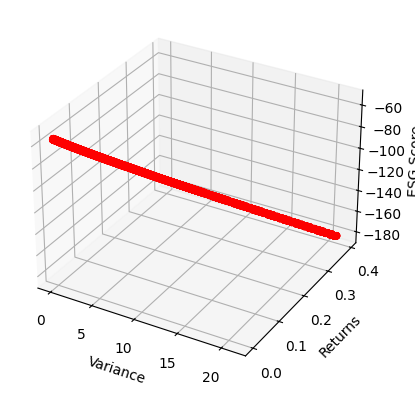

In [14]:
generate_plot(Sigma, mu, Esg_score, u_values, l_values)

In [ ]:
Sigma

,EDELWEISS,HIL
EDELWEISS,0.001810,0.000441
HIL,0.000441,0.001560
